In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
#lets check the shape of the dataframe
df.shape

(8124, 23)

In [4]:
#check is there any null value
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
#Devide the dataframe into featurs and label
x = df.drop(columns=['class'])
y = df['class']

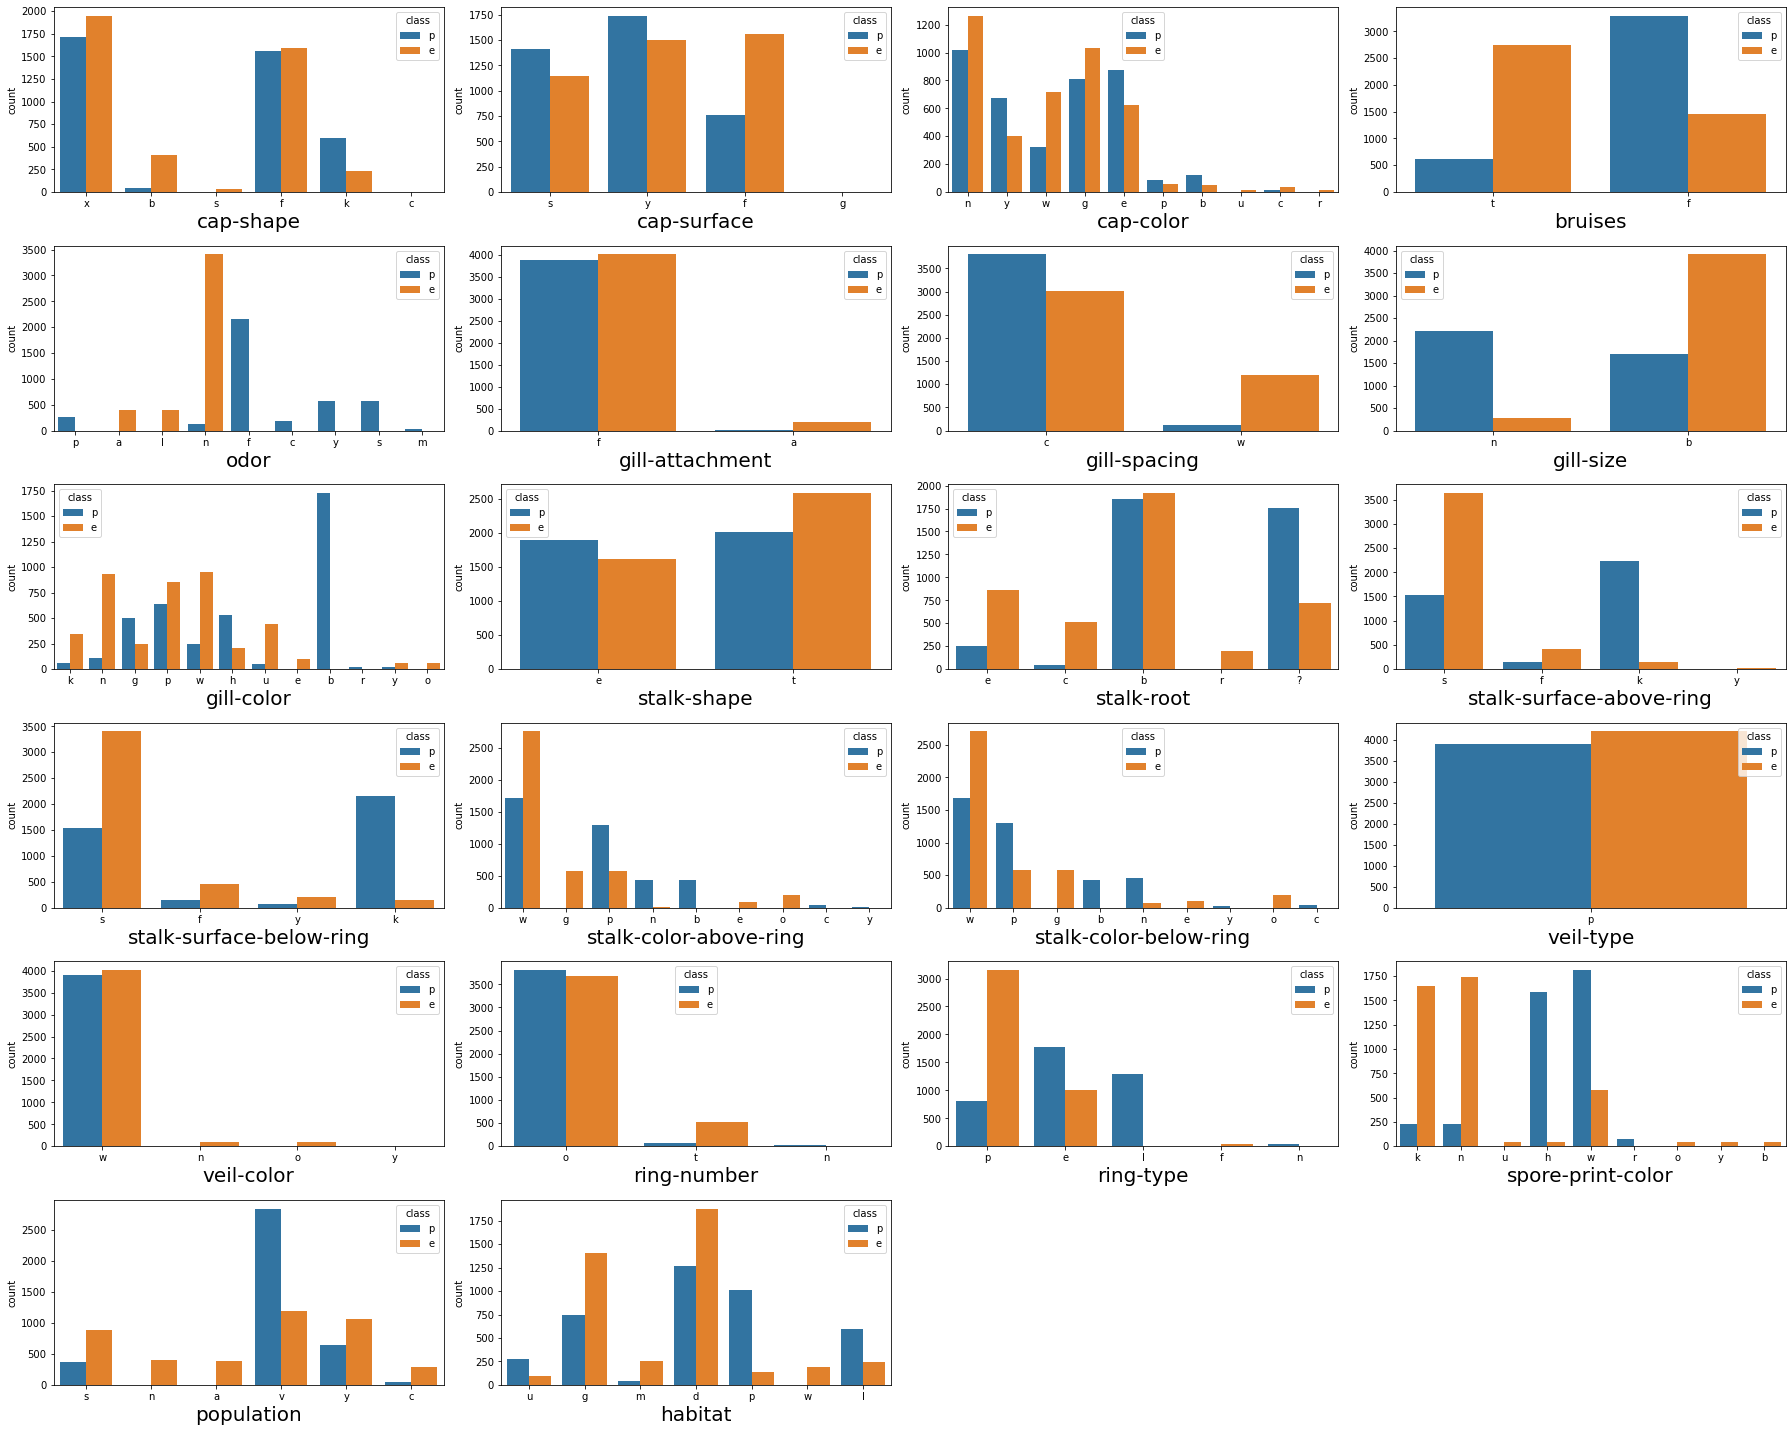

In [7]:
#visualizing relationship with CountPlot
plt.figure(figsize = (25,20))
plotnumber = 1
for column in x:
    if plotnumber <=22:
        ax = plt.subplot(6,4,plotnumber)
        sns.countplot(x[column],hue="class",data = df)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

By observing these visualization plots,it seems we can drop veil-color column,because here maximum of both types are from veil color white,and column has less variance also 

In [8]:
df.drop(columns=["veil-color"],inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df2 = lab_enc.fit_transform(df['class'])
pd.Series(df2)
df["class"] = df2
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,s,w,w,p,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,s,w,w,p,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,s,w,w,p,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,s,w,w,p,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,s,w,w,p,o,e,n,a,g


In [10]:
#encoding the class
le=LabelEncoder()
le.fit(y)
Y=le.transform(y)
Y

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
#getting dummies for catagorical data
x=pd.get_dummies(x,drop_first=True)
x.shape

(8124, 95)

In [12]:
# make input dataset features to same scale
scaler=StandardScaler()
scaler.fit(x)
X=scaler.transform(x)
X=pd.DataFrame(X,columns=x.columns)

# Finding best random_state

In [13]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 1.0 on Random State 1


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25, random_state = max_rs )

In [15]:
#model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

1.0
[[1020    0]
 [   0 1011]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [16]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

1.0
[[1020    0]
 [   0 1011]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [17]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = DecisionTreeClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

1.0
[[1020    0]
 [   0 1011]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [18]:
#model with SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = rf.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))


1.0
[[1020    0]
 [   0 1011]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



We are getting highest accuracy of about 100% for every model we used, it seems these algorithms overfitting, let's do cross validation

In [19]:
#Let's check cross validation score for all algorithms
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X, Y, cv=5)
print("Cross validation score of Logistic Regression model is :", scores.mean())

Cross validation score of Logistic Regression model is : 0.916398787419477


In [20]:
scores = cross_val_score(dt, X, Y, cv=5)
print("Cross validation score of Decesion Tree model is :", scores.mean())

Cross validation score of Decesion Tree model is : 0.9133198938992043


In [21]:
scores = cross_val_score(rf, X, Y, cv=5)
print("Cross validation score of Random Forest model is :", scores.mean())

Cross validation score of Random Forest model is : 0.9408964001515725


In [22]:
scores = cross_val_score(svc, X, Y, cv=5)
print("Cross validation score of SVC model is :", scores.mean())

Cross validation score of SVC model is : 0.8849971201212581


From cross validation we can conclude that RandomForest is a best model among these four models

# Hyperparameter Tuning

In [23]:
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': range(2,10,3),
                'n_estimators':[200,700],
                'max_features':['aoto','sqrt','log2']
                }

In [24]:
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)

In [25]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [26]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [27]:
model = RandomForestClassifier(criterion='gini', max_depth=8, max_features='sqrt', n_estimators=200)

model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

99.9507631708518


# Saving the model

In [28]:
import joblib
joblib.dump(model,"Mushroom.pkl")

['Mushroom.pkl']